<br>

<b><font size=22>Predictive methods</font></b>
# (Homework - Midterm)

**<font color = red>NGUYEN Thi Huong</font>**

**<font color = red>MASTER 2 EBDS</font>**

# Linear algebra, optimization and linear regression
The purpose of this session is to learn how to handle numpy and its features in Python. 

The first part proposes some exercises to manipulate basic functions from numpy. Do not hesitate to visit the following
page: https://numpy.org/doc/.

The second part will focus on some monovariable optimization methods. The goal will be to implement three
well-known methods (golden-section search, parabolic interpolation and Newton’s method). Algorithms in
pseudo-code are provided.

Finally we will work on the Boston’s housing dataset: the goal is to predict the median value of houses’
prices in different suburbs of Boston given different features of the districts (criminality, industrialization,
etc. . . ). 

You will use numpy to implement your own version of the linear regression (we call that “coding from
scratch”). 

For the parameter estimation, you will use either the function minimize from the package scipy
or your own implementation of the gradient descent algorithm (the latter is recommended, even if minimize
is a very interesting function). 

Check the online help !

 Exercise: K-means from scratch

In this exercise, you will code an algorithm from scratch to perform K-means clustering.

## 1. Data generation process:

First generate a “toy example”, a 2-dimensional dataset (only two features
x1 and x2) in order to test your implementation. 

For example, by setting K = 4, you could define a simulation model specific for each cluster, as follows:

* Cluster 1: x1 ∼ N (1, σ) and x2 ∼ N (1, σ)
* Cluster 2: x1 ∼ N (1, σ) and x2 ∼ N (−1, σ)
* Cluster 3: x1 ∼ N (−1, σ) and x2 ∼ N (−1, σ)
* Cluster 4: x1 ∼ N (−1, σ) and x2 ∼ N (1, σ)

## 2. Effect of parameter σ on the resulting clusters

According to the previous data simulation model, setting σ = 0.1, generate K = 4 clusters, each cluster
should contain 25 observations. Draw the corresponding scatterplot, using a different color for each
cluster. Draw the same scatterplot for different values of σ (σ = 0.2, 0.3, 0.4, 0.5, ...). Explain the effect
of parameter σ on the resulting clusters.

For 2 question, I will combine these question into a bloc code.

In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [437]:
np.random.seed(123)

To create a cluster with high dimension(in this case 2D array)from Normal distribution, we can use ``np.random.normal`` 
or ``np.random.distribution`` (may be better in this case)

In [241]:
def data_generation(obs, **params):
    distribution = params.get("Distribution", "normal") 
    mu = params.get("mean", 1)
    sigma = params.get("standard_deviation", 0.1)

    df = pd.DataFrame(columns= ["x1", "x2", "cluster"])
    np.random.seed(123)

    for nb in range(len(mu)):   #for each column in dataframe
        globals()["x" + str(nb + 1)] = np.array([]) #initalize 2 array x1 and x2
        for i, mean in enumerate(mu[nb]): #for each mean in a column
            #append new array to initial array x1 and x2
            globals()["cluster_" + str(nb + 1) + str(i + 1)] = getattr(np.random, distribution)(mean, sigma, obs) #cluster_01 = np.random.distribution(1, 5, obs)
            globals()["x" + str(nb + 1)] = np.concatenate((globals()["x" + str(nb + 1)], globals()["cluster_" + str(nb + 1) + str(i + 1)]), axis = None)
  
    df = pd.concat([df, pd.DataFrame({"x1": x1, "x2": x2, })], ignore_index= True)   
    for i in range(0, obs * len(mu[0]), obs):
        df.loc[(df.index >= i) & (df.index < i + obs), 'cluster'] = "Cluster" + str(i/obs + 1)
    return  df

In [242]:
df = data_generation(25, mean = ([1, 1, -1, -1], [1, -1, -1, 1]))

In [243]:
print(df.to_string())

          x1        x2     cluster
0   0.891437  1.064205  Cluster1.0
1   1.099735  0.802211  Cluster1.0
2   1.028298  1.071226  Cluster1.0
3   0.849371   1.25983  Cluster1.0
4    0.94214  0.997537  Cluster1.0
5   1.165144  1.003414  Cluster1.0
6   0.757332  1.017955  Cluster1.0
7   0.957109  0.813802  Cluster1.0
8   1.126594  1.042615  Cluster1.0
9   0.913326  0.839459  Cluster1.0
10  0.932111  0.957232  Cluster1.0
11  0.990529  1.124287  Cluster1.0
12  1.149139  0.926478  Cluster1.0
13   0.93611  1.050125  Cluster1.0
14  0.955602  1.101274  Cluster1.0
15  0.956565  1.027874  Cluster1.0
16  1.220593  0.862905  Cluster1.0
17  1.218679  0.966752  Cluster1.0
18  1.100405  1.195941  Cluster1.0
19  1.038619  0.797495  Cluster1.0
20  1.073737  0.972421  Cluster1.0
21  1.149073  0.944789  Cluster1.0
22  0.906417  1.012075  Cluster1.0
23  1.117583  1.074822  Cluster1.0
24  0.874612  1.160869  Cluster1.0
25  0.936225 -1.027023  Cluster2.0
26  1.090711 -0.918766  Cluster2.0
27  0.857132 -0.9500

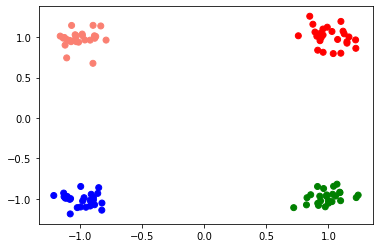

In [236]:
colors = {'Cluster1.0':'red', 'Cluster2.0':'green', 'Cluster3.0':'blue', 'Cluster4.0':'salmon'}
plt.scatter(df.x1, df.x2, c= df['cluster'].map(colors) )

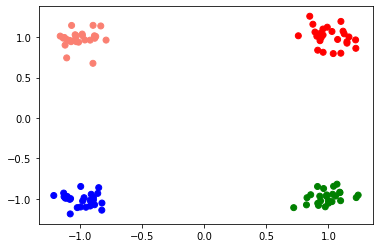

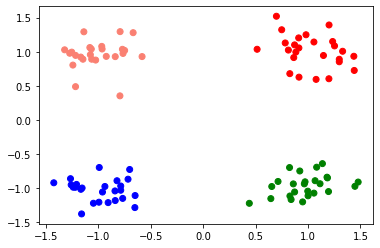

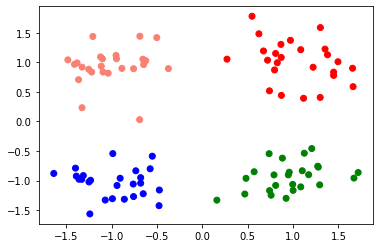

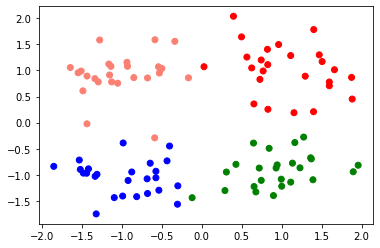

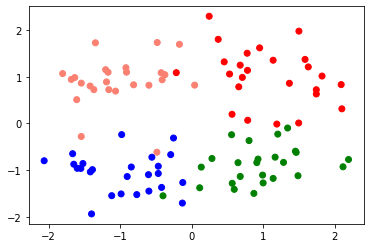

In [246]:
for i in range(1, 6):
    globals()["df" + str(i)]  = data_generation(25, mean = ([1, 1, -1, -1], [1, -1, -1, 1]), standard_deviation = i/10)
    colors = {'Cluster1.0':'red', 'Cluster2.0':'green', 'Cluster3.0':'blue', 'Cluster4.0':'salmon'}
    plt.scatter(globals()["df" + str(i)].x1, globals()["df" + str(i)].x2, c= globals()["df" + str(i)]['cluster'].map(colors) )
    plt.show()

## 3. K cluster centroids
The training dataset should be a matrix X ∈ R n×2 (n = 25K observations and 2 features). Propose a way to initialize K-means, in other words: randomly pick K cluster centroids µ1, µ2, ..., µK.

In [432]:
df_centroids = pd.DataFrame(columns= ["x1", "x2"])
cov = [[0.1, 0], [0, 0.1]]
mean = [np.random.uniform(-1, 1), np.random.uniform(-1, 1)]
x1, x2 = np.random.multivariate_normal(mean, cov, 4).T
df_centroids = pd.concat([df_centroids, pd.DataFrame({"x1": x1, "x2": x2, })], ignore_index= True)  

In [434]:
df_centroids


,x1,x2
0,0.73369,-0.946988
1,-0.165019,-0.448844
2,0.48615,-0.444908
3,0.445014,-0.168743


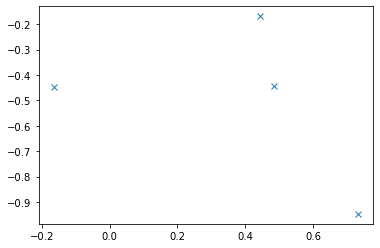

In [435]:
plt.plot(x1, x2, 'x')

## 4. Assign to closest cluster centroid

Implement the cluster assignment step: for each observation x
(i), assign this observations to its closest
cluster centroid, in other words compute for all i ∈ {1, ..., n}:
